Rows: 26 Columns: 61
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (14): Species, Accesion, Order, Family, Genus, animal, BiogeographicRang...
dbl (47): ResearchEffort, DietBreadth, HabitatBreadth, GenerationLength, Gen...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Read 11881 items

max is 26

Rotating trees

estimating master tree branch lengths from 11881 genes

Naming columns of paths matrix

cutoff is set to 0.00711862094688518

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”
i= 1

i= 5894

Naming rows and columns of RER matrix

using metric diff, with filtering constant -1



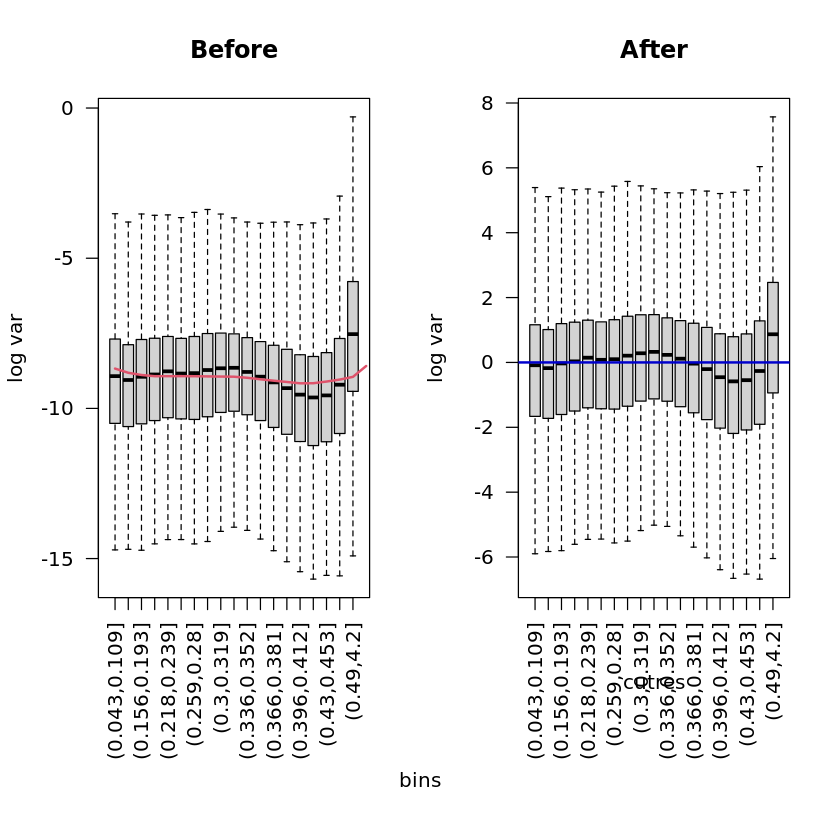

In [4]:
library(readr)
library(tidyverse)
library(treeio)
library(RERconverge)

path = "/vggpfs/fs3/vgl/store/adenisova/Inno/upstreams"
inno_rates <- read_tsv(paste(path,"common_species_with_innovation_rate.tsv",sep="/"))
sp_vect <- setNames(inno_rates$TotInno_ResEff2021, inno_rates$Accesion)

ourTrees=readTrees(paste(path,"common_tree_with_26_raxmlHPC_result_full.txt",sep="/")) # was common_tree_above_30.txt)

mamRERw=RERconverge::getAllResiduals(
    ourTrees,
    useSpecies=names(sp_vect),
    transform = "sqrt", 
    weighted = T,
    scale = T,
)

charpaths=char2Paths(sp_vect, ourTrees)

In [22]:
res=RERconverge::getAllCor(
    mamRERw, 
    charpaths, 
    method = "p", 
    min.pos = 0, 
    winsorizeRER = 3,
) 

ordered_results = res[order(res$P),]

ordered_results$gene <- row.names(ordered_results)
write_tsv(
    ordered_results,
    paste(path,"RERConverge_raxmlHPC_result.tsv",sep="/"),
)
    
# You will also need to save it
head(ordered_results)

,Rho,N,P,p.adj,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
CCDC127,0.4589291,36,0.004872839,0.9998463,CCDC127
CZH9orf40,0.4381296,37,0.006683870,0.9998463,CZH9orf40
LOC116806888,-0.4859787,29,0.007522201,0.9998463,LOC116806888
AKAP5,0.4256126,37,0.008633099,0.9998463,AKAP5
RPS27A,-0.4223851,37,0.009208108,0.9998463,RPS27A
LOC115491242,0.6852117,13,0.009746247,0.9998463,LOC115491242
